In [36]:
import os
import glob
import warnings
import matplotlib.pyplot as plt

import pandas as pd

import numpy.ma as ma
import xarray as xr

import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep


In [41]:
lon = -76.4002945756895
lat = -0.68366795650104


DIR = glob.glob("/uufs/chpc.utah.edu/common/home/u6000251/DF_GITHUB_CODE/Yasuni_Modis_Par/data/*.hdf")

modis_pre_path = DIR[1]
modis_pre = rxr.open_rasterio(modis_pre_path,masked=True).sel(x=lon, y=lat, method='nearest')




In [42]:
modis_pre


<xarray.Dataset>
Dimensions:       (band: 2)
Coordinates:
  * band          (band) int64 1 2
    y             float64 -2.317e+03
    x             float64 -7.786e+06
    spatial_ref   int64 0
Data variables:
    PAR           (band) float32 ...
    GMT_1800_PAR  (band) float32 258.8 nan
    GMT_2100_PAR  (band) float32 79.23 nan
    PAR_Quality   (band) float32 2.0 nan
    Direct        (band) float32 ...
    Diffuse       (band) float32 ...
    GMT_0000_PAR  (band) float32 0.0 nan
    GMT_0300_PAR  (band) float32 0.0 nan
    GMT_0600_PAR  (band) float32 0.0 nan
    GMT_0900_PAR  (band) float32 0.0 nan
    GMT_1200_PAR  (band) float32 47.43 nan
    GMT_1500_PAR  (band) float32 220.8 nan
Attributes: (12/58)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ASSOCIATEDPLATFORMSHORTNAME.2:      Aqua
    ASSOCIATEDSENSORSHORTNAME.1:        MODIS
    ASSOCIATEDSENSORSHORTNAME.2:        MODIS
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            -9.99999999910196
    SPSOPARAMETERS:                     END_OBJECT
    TileID:                             51010009
    VERSIONID:                          6
    VERTICALTILENUMBER:                 9
    WESTBOUNDINGCOORDINATE:             -81.23412894334

In [60]:
modis_pre.PAR.values[0]

240.92389

In [43]:
print(modis_pre.PAR.values)
print(modis_pre.GMT_0600_PAR.values)
print(modis_pre.GMT_0900_PAR.values)
print(modis_pre.GMT_1200_PAR.values)
print(modis_pre.GMT_1500_PAR.values)
print(modis_pre.GMT_1800_PAR.values)

[240.92389 238.83365]
[ 0. nan]
[ 0. nan]
[47.429756       nan]
[220.84975       nan]
[258.81967       nan]


In [61]:
df = pd.DataFrame({'image_file': [], 'date': [],  'PAR':[] , 'GMT_0600_PAR': [], 'GMT_0900_PAR': [], 'GMT_1200_PAR': [], 'GMT_1500_PAR': [], 'GMT_1800_PAR': []})

for i in DIR:
    #print(i)
    modis_pre = rxr.open_rasterio(i,masked=True).sel(x=lon, y=lat, method='nearest')
    df = df.append({'image_file': modis_pre.INPUTPOINTER, 'date': modis_pre.RANGEBEGINNINGDATE,  'PAR': modis_pre.PAR.values[0], 'GMT_0600_PAR': modis_pre.GMT_0600_PAR.values[0], 'GMT_0900_PAR': modis_pre.GMT_0900_PAR.values[0], 'GMT_1200_PAR': modis_pre.GMT_1200_PAR.values[0], 'GMT_1500_PAR': modis_pre.GMT_1500_PAR.values[0], 'GMT_1800_PAR': modis_pre.GMT_1800_PAR.values[0]}, ignore_index=True)
        

In [62]:
df

,image_file,date,PAR,GMT_0600_PAR,GMT_0900_PAR,GMT_1200_PAR,GMT_1500_PAR,GMT_1800_PAR
0,MOD18IPGD.A2021187.h10v09.006.2021189040702.hd...,2021-07-06,325.842529,0.0,0.0,77.287819,341.014984,277.339905
1,MOD18IPGD.A2021188.h10v09.006.2021190034456.hd...,2021-07-07,240.923889,0.0,0.0,47.429756,220.849747,258.819672
2,MOD18IPGD.A2021189.h10v09.006.2021191033209.hd...,2021-07-08,211.744675,0.0,0.0,50.279037,234.565613,257.121338
3,MOD18IPGD.A2021190.h10v09.006.2021192035339.hd...,2021-07-09,163.299606,0.0,0.0,33.070644,154.624603,133.741196
4,MOD18IPGD.A2021191.h10v09.006.2021193034723.hd...,2021-07-10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
82,MOD18IPGD.A2021269.h10v09.006.2021274172532.hd...,2021-09-26,408.293793,0.0,0.0,141.586060,435.571716,440.552002
83,MOD18IPGD.A2021270.h10v09.006.2021274174814.hd...,2021-09-27,304.626190,0.0,0.0,74.078056,291.265625,360.067108
84,MOD18IPGD.A2021271.h10v09.006.2021274181557.hd...,2021-09-28,NaN,NaN,NaN,NaN,NaN,NaN
85,MOD18IPGD.A2021272.h10v09.006.2021274220921.hd...,2021-09-29,314.044739,0.0,0.0,79.882050,310.641693,194.838287


In [63]:
df.plot(

SyntaxError: unexpected EOF while parsing (1840726922.py, line 1)

<AxesSubplot:xlabel='date'>

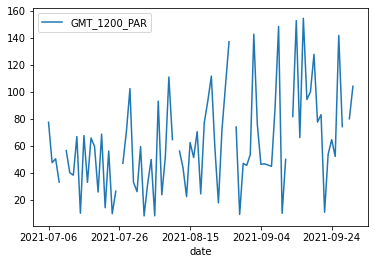

In [65]:
df.plot(x="date", y="GMT_1200_PAR")